In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({'axes.labelsize': '22',
                     'xtick.labelsize':'18',
                     'ytick.labelsize': '18',
                     'legend.fontsize': '18',
                     'figure.figsize': (8, 8),
                     'font.size': 22})

def increase_linewidth(ax):
    lines = ax.get_lines()
    for line in lines:
        line.set_linewidth(3)
    if len(lines) > 1:
        leg = ax.legend()
        leg_lines = leg.get_lines()
        plt.setp(leg_lines, linewidth=5)

In [3]:
model_directory = "models/grab_a_puck/"
data_directory = "grab_a_puck_plots/"

In [4]:
stats = pd.read_hdf(data_directory+"training_data.h5", "training_data")

In [5]:
stats["Episode"] = stats.index

In [6]:
stats.head()

,control,correct_answer,episode_length,question_loss,value_loss,seed,Episode
0,0,False,600,0,0.009906,0,0
1,0,False,600,0,0.007848,0,1
2,0,False,600,0,0.006897,0,2
3,0,False,600,0,0.005704,0,3
4,0,False,600,0,0.004523,0,4


In [7]:
WINDOW_SIZE = 500

In [8]:
columns = ["control", "episode_length", "value_loss"]
rolling_stats = []

for seed, df in stats.groupby("seed"):
    rolling_df = pd.DataFrame(columns=columns)
    for column in columns:
        rolling_df[column] = df[column].rolling(window=WINDOW_SIZE).mean()
    # rolling_df.control.plot()
    """plt.show()
    rolling_df.value_loss.plot()
    plt.show()
    rolling_df.episode_length.plot()
    plt.show()"""
    rolling_stats.append(rolling_df)
rolling_stats = pd.concat(rolling_stats)

In [9]:
rolling_stats["Episode"] = rolling_stats.index

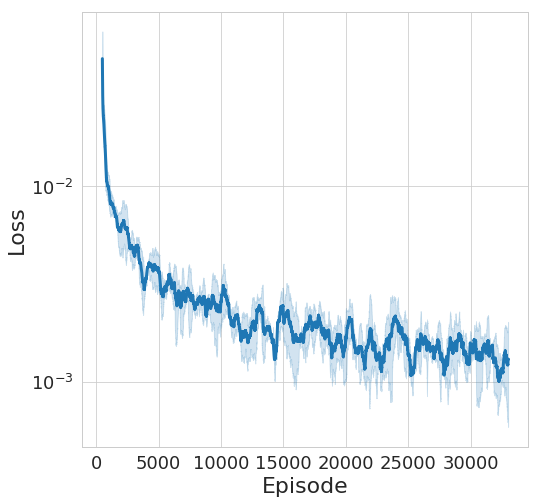

In [10]:
ax = sns.lineplot(x="Episode", y="value_loss", markers=True, data=rolling_stats, linewidth=3, ci="sd")
ax.set_yscale("log")
plt.ylabel("Loss")
increase_linewidth(ax)
plt.savefig(data_directory+"loss.pdf")

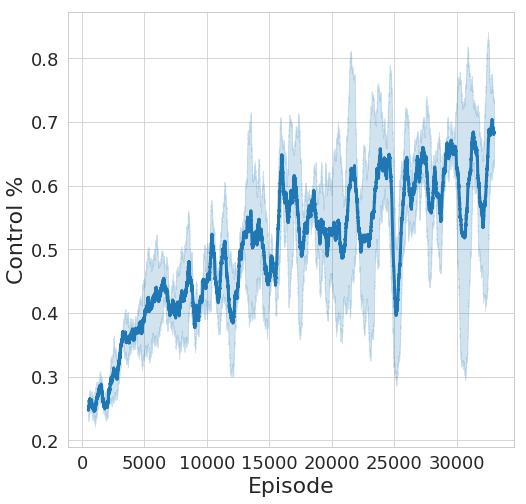

In [11]:
rolling_stats["Episode"] = rolling_stats.index
ax = sns.lineplot(x="Episode", y="control", markers=True, data=rolling_stats, linewidth=3, ci="sd")
increase_linewidth(ax)
plt.ylabel("Control %")
plt.savefig(data_directory+"control.pdf")

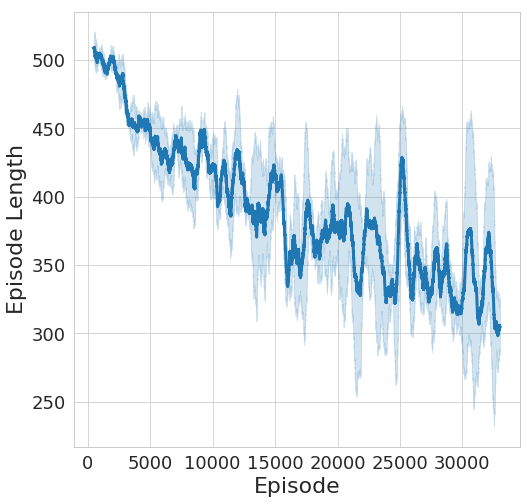

In [12]:
ax = sns.lineplot(x="Episode", y="episode_length", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Episode Length")
increase_linewidth(ax)
plt.savefig(data_directory+"episode_length.pdf")

# Validation data

In [13]:
stats = pd.read_hdf(data_directory+"validation_data.h5", "validation_data")

In [14]:
stats.episode = stats.episode.astype(int)
stats.seed = stats.seed.astype(int)

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


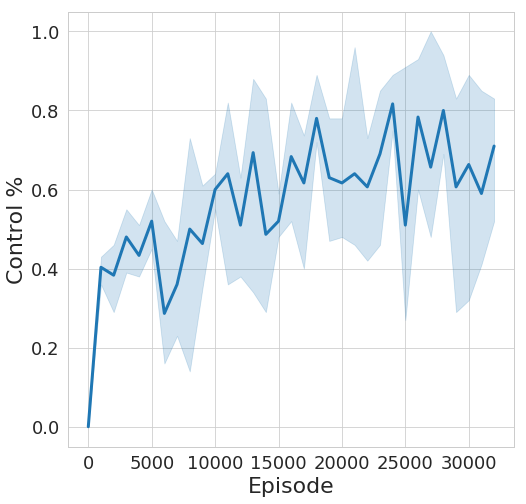

In [15]:
plt.xticks(ticks=np.arange(0, 35000, 5000), labels=np.arange(0, 35000, 5000))
ax = sns.lineplot(x="episode", y="avg_control", data=stats, linewidth=3)
plt.ylabel("Control %")
plt.xlabel("Episode")
increase_linewidth(ax)
plt.savefig(data_directory+"validation_control.pdf")

In [16]:
stats.sort_values(by="avg_control", ascending=False).iloc[0]

avg_control               1.000000
avg_episode_length      256.940000
std_control               0.000000
std_episode_length      308.130421
seed                     72.000000
episode               27000.000000
Name: 0, dtype: float64

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


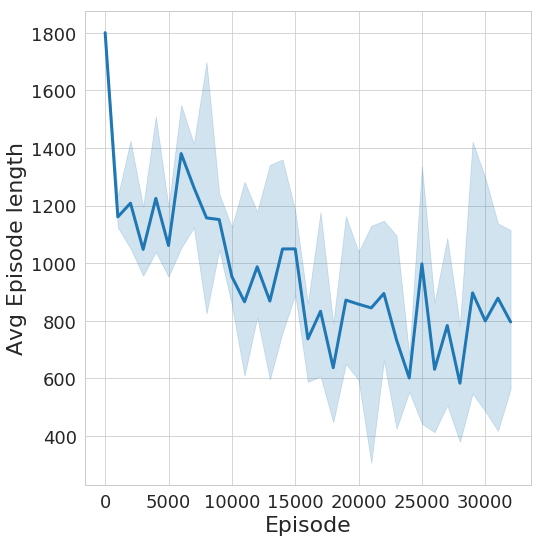

In [17]:
plt.xticks(ticks=np.arange(0, 35000, 5000), labels=np.arange(0, 35000, 5000))
ax = sns.lineplot(x="episode", y="avg_episode_length", data=stats, linewidth=3)
plt.ylabel("Avg Episode length")
plt.xlabel("Episode")
increase_linewidth(ax)
plt.tight_layout()
plt.savefig(data_directory+"validation_ep_length.pdf")